# Plot boundaries


## Setup

Import the following packages:

In [1]:
import numpy as np
import pandas as pd

import geopandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import shapely
from shapely.geometry import shape, mapping  # For conversion from shapely polygon to geojson and back

Look for data in these places:

In [3]:
paths = dict(
    dir_data_input = '../data_example/',
    dir_data_geojson = '../data_geojson/ons_data/',
    dir_data_tabular = '../data_tabular/',
    values_file = 'example_lsoa_englandwales.csv',
    lsoa_geojson = 'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    lsoa_regions = 'LSOA_regions.csv',
    stroke_hospitals = 'stroke_hospitals_2022.csv'
)

In [4]:
boundary_files = {
    'LSOA11NM':'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    'CCG19NM':'Clinical_Commissioning_Groups_April_2019_Boundaries_EN_BGC_2022_-7963862461000886750.geojson',
    'ICB22NM':'ICB_JUL_2022_EN_BGC_V3_7901616774526941461.geojson',
    'LAD17NM':'LAD_Dec_2017_GCB_GB_2022_5230662237199919616.geojson',
    'STP19NM':'STP_Apr_2019_GCB_in_England_2022_3138810296697318496.geojson',
    'LHB20NM':'Local_Health_Boards_April_2020_WA_BGC_2022_94310626700012506.geojson',
    'SCN17NM':'SCN_Dec_2016_GCB_in_England_2022_8470122845735728627.geojson',
    'RGN11NM':'Regions_December_2022_EN_BGC_4589208765943883498.geojson',
}

## Load in a boundary file

In [5]:
boundary_file = boundary_files['CCG19NM']

geojson_file =f"{paths['dir_data_geojson']}{boundary_file}"
df_geojson = geopandas.read_file(geojson_file)#, crs='EPSG:27700')

In [6]:
df_geojson

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E38000001,"NHS Airedale, Wharfedale and Craven CCG",393990,462191,-2.093300,54.0556,0025eb18-d86b-4a5f-9aa1-40ddd4dfcbdd,"POLYGON ((399803.689 475231.193, 400155.625 47..."
1,2,E38000002,NHS Ashford CCG,597640,140644,0.823374,51.1310,4d20f779-50a4-4741-b77f-b0fe806bcc7d,"POLYGON ((610050.499 146602.203, 609973.500 14..."
2,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"MULTIPOLYGON (((543881.063 183185.609, 543837...."
3,4,E38000005,NHS Barnet CCG,523471,191753,-0.218220,51.6111,33c19357-966f-4f89-86de-359ab645b3f0,"POLYGON ((525814.122 198211.514, 525568.563 19..."
4,5,E38000006,NHS Barnsley CCG,429979,403330,-1.549250,53.5258,3ca87b20-21e0-4acb-b373-1f4df14aa460,"POLYGON ((443219.660 409833.090, 443286.853 40..."
...,...,...,...,...,...,...,...,...,...
186,187,E38000226,NHS Fylde and Wyre CCG,345943,440271,-2.823300,53.8559,2afea037-5406-452f-9f2c-88d5e31633bd,"MULTIPOLYGON (((341719.765 450567.916, 341715...."
187,188,E38000227,NHS Greater Preston CCG,358317,435004,-2.634480,53.8097,21583264-65b8-409b-aa4a-7f9d2e4ce100,"MULTIPOLYGON (((347728.756 429688.754, 347726...."
188,189,E38000228,NHS Morecambe Bay CCG,362268,479660,-2.580040,54.2113,5b0b624c-dca1-4f52-9a7a-f78bf276c54f,"MULTIPOLYGON (((319773.799 485609.095, 319745...."
189,190,E38000229,NHS Derby and Derbyshire CCG,426752,353558,-1.602100,53.0786,1ec3276c-a5db-4ecd-a2ba-7f4f98299b8b,"POLYGON ((445071.250 381534.375, 445074.597 38..."


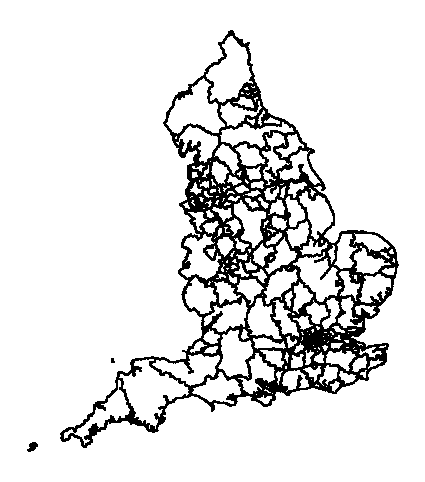

In [7]:
fig, ax = plt.subplots(figsize=(6, 6)) # Make max dimensions XxY inch

# Draw the main map with colours (choropleth):
df_geojson.plot(
    ax=ax,              # Set which axes to use for plot (only one here)
    # column='OBJECTID',     # Column to apply colour
    antialiased=False,  # Avoids artifact boundry lines
    # edgecolor='face',   # Make LSOA boundry same colour as area
    facecolor='None',
    edgecolor='k',   # Make LSOA boundry same colour as area
    # vmin=-range,        # Manual scale min (remove to make automatic)
    # vmax=range,         # Manual scale max (remove to make automatic)
    # cmap='viridis',     # Colour map to use
    legend_kwds={
        'shrink':0.5,   # Adjust size of colourmap key
        'label':'Dummy data'  # Add label
    },
    legend=True         # Set to display legend
    )

ax.set_axis_off()  # Turn off axis line and numbers
# plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()

In [8]:
df_geojson['geometry']

0      POLYGON ((399803.689 475231.193, 400155.625 47...
1      POLYGON ((610050.499 146602.203, 609973.500 14...
2      MULTIPOLYGON (((543881.063 183185.609, 543837....
3      POLYGON ((525814.122 198211.514, 525568.563 19...
4      POLYGON ((443219.660 409833.090, 443286.853 40...
                             ...                        
186    MULTIPOLYGON (((341719.765 450567.916, 341715....
187    MULTIPOLYGON (((347728.756 429688.754, 347726....
188    MULTIPOLYGON (((319773.799 485609.095, 319745....
189    POLYGON ((445071.250 381534.375, 445074.597 38...
190    MULTIPOLYGON (((213325.945 143307.255, 213276....
Name: geometry, Length: 191, dtype: geometry

## Round polygon coordinates to avoid floating point errors

Some of the ONS geojson files contain floating point errors. Some of the coordinates are given to three decimal places and others to several more where the extra digits are 9999999 or 0000001. This means that tests of whether polygons are touching will fail unexpectedly because according to the tiniest precision there is a teeny tiny gap between polygons.

In [9]:
# Remove floating point errors
for i in range(len(df_geojson)):
    poly = df_geojson['geometry'][i]
    # Convert shapely object to geojson object
    gpoly = mapping(poly)
    if len(gpoly['coordinates']) == 1:
        # This is probably a normal polygon.
        a_coords = np.array(gpoly['coordinates'])
        new_coords = np.round(a_coords, 3)
    else:
        # This is probably a multipolygon but could be a polygon
        # that has multiple sets of coordinates for some reason
        # (maybe a hole, doughnut-shaped polygon?).
        new_coords = []
        for c, coords in enumerate(gpoly['coordinates']):
            a_coords = np.array(gpoly['coordinates'][c])
            a_coords = np.round(a_coords, 3)
            new_coords.append(a_coords)
    gpoly['coordinates'] = new_coords

    # Convert back to shapely object
    poly = shape(gpoly)
    # Place back into the DataFrame
    df_geojson['geometry'][i] = poly

In [10]:
df_geojson

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E38000001,"NHS Airedale, Wharfedale and Craven CCG",393990,462191,-2.093300,54.0556,0025eb18-d86b-4a5f-9aa1-40ddd4dfcbdd,"POLYGON ((399803.689 475231.193, 400155.625 47..."
1,2,E38000002,NHS Ashford CCG,597640,140644,0.823374,51.1310,4d20f779-50a4-4741-b77f-b0fe806bcc7d,"POLYGON ((610050.499 146602.203, 609973.500 14..."
2,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"MULTIPOLYGON (((543881.063 183185.609, 543837...."
3,4,E38000005,NHS Barnet CCG,523471,191753,-0.218220,51.6111,33c19357-966f-4f89-86de-359ab645b3f0,"POLYGON ((525814.122 198211.514, 525568.563 19..."
4,5,E38000006,NHS Barnsley CCG,429979,403330,-1.549250,53.5258,3ca87b20-21e0-4acb-b373-1f4df14aa460,"POLYGON ((443219.660 409833.090, 443286.853 40..."
...,...,...,...,...,...,...,...,...,...
186,187,E38000226,NHS Fylde and Wyre CCG,345943,440271,-2.823300,53.8559,2afea037-5406-452f-9f2c-88d5e31633bd,"MULTIPOLYGON (((341719.765 450567.916, 341715...."
187,188,E38000227,NHS Greater Preston CCG,358317,435004,-2.634480,53.8097,21583264-65b8-409b-aa4a-7f9d2e4ce100,"MULTIPOLYGON (((347728.756 429688.754, 347726...."
188,189,E38000228,NHS Morecambe Bay CCG,362268,479660,-2.580040,54.2113,5b0b624c-dca1-4f52-9a7a-f78bf276c54f,"MULTIPOLYGON (((319773.799 485609.095, 319745...."
189,190,E38000229,NHS Derby and Derbyshire CCG,426752,353558,-1.602100,53.0786,1ec3276c-a5db-4ecd-a2ba-7f4f98299b8b,"POLYGON ((445071.250 381534.375, 445074.597 38..."


## Find neighbouring polygons

### Split any MultiPolygon objects into a separate entry for each Polygon

One row of the original DataFrame that contains a MultiPolygon will be split into several rows that each take one Polygon from the MultiPolygon. The other row contents are the same for these split objects.

In [11]:
# Expand the dataframe - need a separate row for each polygon, so split apart any multipolygons.
df = df_geojson.copy()
df_new = pd.DataFrame(columns=df.columns)

r = 0
for i in range(len(df)):
    row = df.iloc[i]
    if isinstance(row['geometry'], shapely.geometry.polygon.Polygon):
        # All ok here, copy row contents exactly:
        df_new.loc[r] = df.iloc[i]
        r += 1
    else:
        # MultiPolygon! Split it.
        # Place each Polygon on its own row.
        multipoly = row['geometry']
        for poly in list(multipoly.geoms):
            row_new = row.copy()
            row_new['geometry'] = poly
            df_new.loc[r] = row_new
            r += 1

# Convert this to a GeoDataFrame to match the input df_geojson:
df_new = geopandas.GeoDataFrame(
    df_new, geometry=df_new['geometry']#, crs="EPSG:4326"
)

Should see that some rows now share an OBJECTID and other data, but have different entries in 'geometry':

In [12]:
df_new

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E38000001,"NHS Airedale, Wharfedale and Craven CCG",393990,462191,-2.0933,54.0556,0025eb18-d86b-4a5f-9aa1-40ddd4dfcbdd,"POLYGON ((399803.689 475231.193, 400155.625 47..."
1,2,E38000002,NHS Ashford CCG,597640,140644,0.823374,51.131,4d20f779-50a4-4741-b77f-b0fe806bcc7d,"POLYGON ((610050.499 146602.203, 609973.500 14..."
2,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"POLYGON ((543881.063 183185.609, 543837.938 18..."
3,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"POLYGON ((549864.800 181434.100, 549383.600 18..."
4,4,E38000005,NHS Barnet CCG,523471,191753,-0.21822,51.6111,33c19357-966f-4f89-86de-359ab645b3f0,"POLYGON ((525814.122 198211.514, 525568.563 19..."
...,...,...,...,...,...,...,...,...,...
683,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((246985.700 52710.400, 246942.899 527..."
684,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((247679.900 50322.200, 246758.300 504..."
685,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((250135.476 47269.636, 249961.696 473..."
686,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((264628.900 43703.100, 264588.317 437..."


In [13]:
df = df_new.copy()
df['my_neighbors'] = [[]] * len(df)

for index, row in df.iterrows():
    if isinstance(row['geometry'], shapely.geometry.polygon.Polygon): 
        neighbors = df[df.geometry.touches(row['geometry'])]['CCG19NM'].tolist()
    elif not isinstance(row['geometry'], shapely.geometry.point.Point):
        # This is a MultiPolygon. Check each Polygon separately.
        multipoly = row['geometry']
        neighbors = []
        for polygon in list(multipoly.geoms):
            neighbours_here = df[df.geometry.intersects(polygon)].index.tolist()
            neighbors += neighbours_here
    else:
        # It's a point! Ignore.
        pass
    try:
        # Don't let the place be its own neighbour.
        neighbors = neighbors.remove(row.name)
    except ValueError:
        # Its own name is not in the list of neighbours.
        pass
    df.at[index, 'my_neighbors'] = neighbors
    # df.loc[index]['my_neighbors'] = neighbors #", ".join([f'{n}' for n in neighbors])

df_neighbours = df.copy()

In [14]:
df_neighbours

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,my_neighbors
0,1,E38000001,"NHS Airedale, Wharfedale and Craven CCG",393990,462191,-2.0933,54.0556,0025eb18-d86b-4a5f-9aa1-40ddd4dfcbdd,"POLYGON ((399803.689 475231.193, 400155.625 47...","[NHS Bradford Districts CCG, NHS Calderdale CC..."
1,2,E38000002,NHS Ashford CCG,597640,140644,0.823374,51.131,4d20f779-50a4-4741-b77f-b0fe806bcc7d,"POLYGON ((610050.499 146602.203, 609973.500 14...","[NHS Canterbury and Coastal CCG, NHS Hastings ..."
2,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"POLYGON ((543881.063 183185.609, 543837.938 18...","[NHS Newham CCG, NHS Newham CCG, NHS Newham CC..."
3,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"POLYGON ((549864.800 181434.100, 549383.600 18...","[NHS Havering CCG, NHS Redbridge CCG]"
4,4,E38000005,NHS Barnet CCG,523471,191753,-0.21822,51.6111,33c19357-966f-4f89-86de-359ab645b3f0,"POLYGON ((525814.122 198211.514, 525568.563 19...","[NHS Brent CCG, NHS Camden CCG, NHS Enfield CC..."
...,...,...,...,...,...,...,...,...,...,...
683,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((246985.700 52710.400, 246942.899 527...",[]
684,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((247679.900 50322.200, 246758.300 504...",[]
685,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((250135.476 47269.636, 249961.696 473...",[]
686,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"POLYGON ((264628.900 43703.100, 264588.317 437...",[]


Recombine any split rows back into a single row for each place with all of its neighbours in one list.

In [15]:
df = df_geojson.copy()
df['neighbour_list'] = [[]] * len(df)

for i in range(len(df)):
    # What is this called in the original dataframe?
    objectid = df.iloc[i]['OBJECTID']
    region_name = df.iloc[i]['CCG19CD']
    # Where did this end up in the polygon dataframe?
    df_here = df_neighbours[df_neighbours['OBJECTID'] == objectid]
    # Combine multiple lists of neighbours into one list:
    list_of_neighbours = np.concatenate(df_here['my_neighbors'].values)
    # Remove any repeats:
    list_of_neighbours = list(set(list_of_neighbours))
    df.at[i, 'neighbour_list'] = list_of_neighbours
    

In [16]:
df

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,neighbour_list
0,1,E38000001,"NHS Airedale, Wharfedale and Craven CCG",393990,462191,-2.093300,54.0556,0025eb18-d86b-4a5f-9aa1-40ddd4dfcbdd,"POLYGON ((399803.689 475231.193, 400155.625 47...","[NHS Leeds CCG, NHS Bradford Districts CCG, NH..."
1,2,E38000002,NHS Ashford CCG,597640,140644,0.823374,51.1310,4d20f779-50a4-4741-b77f-b0fe806bcc7d,"POLYGON ((610050.499 146602.203, 609973.500 14...","[NHS South Kent Coast CCG, NHS West Kent CCG, ..."
2,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"MULTIPOLYGON (((543881.063 183185.609, 543837....","[NHS Havering CCG, NHS Newham CCG, NHS Redbrid..."
3,4,E38000005,NHS Barnet CCG,523471,191753,-0.218220,51.6111,33c19357-966f-4f89-86de-359ab645b3f0,"POLYGON ((525814.122 198211.514, 525568.563 19...","[NHS Harrow CCG, NHS Camden CCG, NHS Haringey ..."
4,5,E38000006,NHS Barnsley CCG,429979,403330,-1.549250,53.5258,3ca87b20-21e0-4acb-b373-1f4df14aa460,"POLYGON ((443219.660 409833.090, 443286.853 40...","[NHS Wakefield CCG, NHS Tameside and Glossop C..."
...,...,...,...,...,...,...,...,...,...,...
186,187,E38000226,NHS Fylde and Wyre CCG,345943,440271,-2.823300,53.8559,2afea037-5406-452f-9f2c-88d5e31633bd,"MULTIPOLYGON (((341719.765 450567.916, 341715....","[NHS Morecambe Bay CCG, NHS Blackpool CCG, NHS..."
187,188,E38000227,NHS Greater Preston CCG,358317,435004,-2.634480,53.8097,21583264-65b8-409b-aa4a-7f9d2e4ce100,"MULTIPOLYGON (((347728.756 429688.754, 347726....","[NHS East Lancashire CCG, NHS Fylde and Wyre C..."
188,189,E38000228,NHS Morecambe Bay CCG,362268,479660,-2.580040,54.2113,5b0b624c-dca1-4f52-9a7a-f78bf276c54f,"MULTIPOLYGON (((319773.799 485609.095, 319745....","[NHS East Lancashire CCG, NHS Fylde and Wyre C..."
189,190,E38000229,NHS Derby and Derbyshire CCG,426752,353558,-1.602100,53.0786,1ec3276c-a5db-4ecd-a2ba-7f4f98299b8b,"POLYGON ((445071.250 381534.375, 445074.597 38...","[NHS West Leicestershire CCG, NHS Barnsley CCG..."


In [17]:
# Check who has Devon as a neighbour.
# Expect to see neighbours of Cornwall, Somerset, and Dorset.
df[df['neighbour_list'].astype(str).str.contains('Devon')]

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,neighbour_list
35,36,E38000045,NHS Dorset CCG,375748,99796,-2.34547,50.7972,ca89a074-0647-4703-ad1d-8d1f132cfdb7,"MULTIPOLYGON (((416350.204 92412.896, 416250.4...","[NHS Wiltshire CCG, NHS Somerset CCG, NHS West..."
73,74,E38000089,NHS Kernow CCG,212501,64494,-4.64249,50.4502,6c560816-0546-41eb-ace1-9dbd314a9af6,"MULTIPOLYGON (((211740.701 93341.801, 211725.5...",[NHS Devon CCG]
119,120,E38000150,NHS Somerset CCG,309310,131072,-3.29581,51.0718,9eee1485-94fc-49e8-8381-6fabf8fa3be3,"MULTIPOLYGON (((329191.704 148543.199, 329104....","[NHS Bristol, North Somerset and South Glouces..."
